In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((303, 13), (102, 13), (303,), (102,))

In [5]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
y_train[0]

15.2

In [7]:
model = Sequential()

model.add (Dense(10, input_shape=(13, )))
model.add ( Activation('sigmoid'))

model.add (Dense(8, activation='sigmoid'))
model.add (Dense(6, activation='sigmoid'))
model.add (Dense(4, activation='sigmoid'))

model.add (Dense(1) )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 315
Trainable params: 315
Non-trainable params: 0
__________________________________________________________

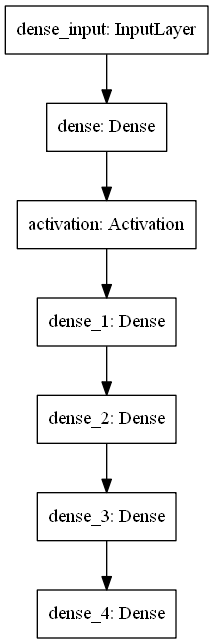

In [9]:
plot_model(model)

In [10]:
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate=0.02),
              metrics = ['mse'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 315
Trainable params: 315
Non-trainable params: 0
__________________________________________________________

In [12]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 569.7626 - mse: 569.7626 - val_loss: 532.1303 - val_mse: 532.1303
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 475.1962 - mse: 475.1962 - val_loss: 490.9485 - val_mse: 490.9485
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 454.2357 - mse: 454.2357 - val_loss: 455.4919 - val_mse: 455.4919
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 395.0113 - mse: 395.0113 - val_loss: 425.0245 - val_mse: 425.0245
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 387.7714 - mse: 387.7714 - val_loss: 398.0696 - val_mse: 398.0696
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 359.8726 - mse: 359.8726 - val_loss: 373.0233 - val_mse: 373.0233
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 355.0748 - mse: 355.0748 - val_loss: 349.6148 - val_mse: 349.6148
Epoch 8/100
9/9 [=======================

In [37]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 84.6340 - mse: 84.6340
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 84.6370 - mse: 84.6370
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 84.6493 - mse: 84.6492
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 84.8267 - mse: 84.8267
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 84.7592 - mse: 84.7592
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 84.7020 - mse: 84.7020
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 84.6918 - mse: 84.6918
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 84.6244 - mse: 84.6244
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 84.6388 - mse: 84.6388
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 84.6261 - mse: 84.6261
Epoch 11/100
9/9 [==============================] - 0s 3ms/

In [43]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 83.7473 - mse: 83.7473


[83.74725341796875, 83.74725341796875]

In [13]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [14]:
result = model.evaluate(X_test, y_test)
print ('loss :', result[0])
print ('mse  :', result[1])

4/4 [==============================] - 0s 2ms/step - loss: 84.1177 - mse: 84.1177
loss : 84.11767578125
mse  : 84.11767578125


In [37]:
# 성능개선을 위한 작업
# 1. 스케일링
# 2. 학습데이터를 학습, 검증 데이터로 나눈다
# 3. 모델 생성시, activation = 'relu' , 컴파일 optimiaer = SGD
# 4. 학습, 결과 확인

In [48]:
(X_train_raw, y_train_raw), (X_test, y_test) = boston_housing.load_data()

In [49]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform (X_train_raw)

In [50]:
X_train_scaler[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [51]:
scaler = StandardScaler()
X_test_scaler = scaler.fit_transform (X_test)

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaler, y_train_raw)

In [53]:
model = Sequential()

model.add (Dense(128, input_shape=(13, ), activation='relu'))

model.add (Dense(64, activation='relu'))
model.add (Dense(32, activation='relu'))

model.add (Dense(1) )

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate=0.02),
              metrics = ['mse'])

In [58]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 300, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/300
7/7 [==============================] - 0s 17ms/step - loss: 1.2534 - mse: 1.2534 - val_loss: 14.0243 - val_mse: 14.0243
Epoch 2/300
7/7 [==============================] - 0s 9ms/step - loss: 1.2859 - mse: 1.2859 - val_loss: 12.5721 - val_mse: 12.5721
Epoch 3/300
7/7 [==============================] - 0s 9ms/step - loss: 1.4885 - mse: 1.4885 - val_loss: 17.8502 - val_mse: 17.8502
Epoch 4/300
7/7 [==============================] - 0s 9ms/step - loss: 2.5372 - mse: 2.5372 - val_loss: 16.2267 - val_mse: 16.2267
Epoch 5/300
7/7 [==============================] - 0s 9ms/step - loss: 4.8095 - mse: 4.8095 - val_loss: 17.6953 - val_mse: 17.6953
Epoch 6/300
7/7 [==============================] - 0s 8ms/step - loss: 8.2140 - mse: 8.2140 - val_loss: 9.0492 - val_mse: 9.0492
Epoch 7/300
7/7 [==============================] - 0s 10ms/step - loss: 6.8798 - mse: 6.8798 - val_loss: 15.8173 - val_mse: 15.8173
Epoch 8/300
7/7 [==============================] - 0s 9ms/step - loss: 6.1642 - mse

Epoch 63/300
7/7 [==============================] - 0s 8ms/step - loss: 1.2934 - mse: 1.2934 - val_loss: 13.2148 - val_mse: 13.2148
Epoch 64/300
7/7 [==============================] - 0s 9ms/step - loss: 2.3751 - mse: 2.3751 - val_loss: 13.2514 - val_mse: 13.2514
Epoch 65/300
7/7 [==============================] - 0s 8ms/step - loss: 2.4457 - mse: 2.4457 - val_loss: 16.2960 - val_mse: 16.2960
Epoch 66/300
7/7 [==============================] - 0s 8ms/step - loss: 3.6912 - mse: 3.6912 - val_loss: 20.6969 - val_mse: 20.6969
Epoch 67/300
7/7 [==============================] - 0s 8ms/step - loss: 5.2413 - mse: 5.2413 - val_loss: 21.9245 - val_mse: 21.9245
Epoch 68/300
7/7 [==============================] - 0s 8ms/step - loss: 6.1584 - mse: 6.1584 - val_loss: 9.2547 - val_mse: 9.2547
Epoch 69/300
7/7 [==============================] - 0s 10ms/step - loss: 4.4243 - mse: 4.4243 - val_loss: 18.0729 - val_mse: 18.0729
Epoch 70/300
7/7 [==============================] - 0s 8ms/step - loss: 3.959

Epoch 125/300
7/7 [==============================] - 0s 10ms/step - loss: 4.8081 - mse: 4.8081 - val_loss: 17.3715 - val_mse: 17.3715
Epoch 126/300
7/7 [==============================] - 0s 9ms/step - loss: 2.8992 - mse: 2.8992 - val_loss: 20.1098 - val_mse: 20.1098
Epoch 127/300
7/7 [==============================] - 0s 9ms/step - loss: 3.0320 - mse: 3.0320 - val_loss: 13.9455 - val_mse: 13.9455
Epoch 128/300
7/7 [==============================] - 0s 12ms/step - loss: 2.1993 - mse: 2.1993 - val_loss: 15.3382 - val_mse: 15.3382
Epoch 129/300
7/7 [==============================] - 0s 11ms/step - loss: 1.7260 - mse: 1.7260 - val_loss: 16.2907 - val_mse: 16.2907
Epoch 130/300
7/7 [==============================] - 0s 11ms/step - loss: 1.8320 - mse: 1.8320 - val_loss: 13.3374 - val_mse: 13.3374
Epoch 131/300
7/7 [==============================] - 0s 10ms/step - loss: 1.6162 - mse: 1.6162 - val_loss: 15.6451 - val_mse: 15.6451
Epoch 132/300
7/7 [==============================] - 0s 10ms/ste

7/7 [==============================] - 0s 8ms/step - loss: 2.2526 - mse: 2.2526 - val_loss: 15.7351 - val_mse: 15.7351
Epoch 248/300
7/7 [==============================] - 0s 9ms/step - loss: 1.3584 - mse: 1.3584 - val_loss: 16.2071 - val_mse: 16.2071
Epoch 249/300
7/7 [==============================] - 0s 9ms/step - loss: 1.0207 - mse: 1.0207 - val_loss: 16.5882 - val_mse: 16.5882
Epoch 250/300
7/7 [==============================] - 0s 9ms/step - loss: 0.9413 - mse: 0.9413 - val_loss: 13.9241 - val_mse: 13.9241
Epoch 251/300
7/7 [==============================] - 0s 9ms/step - loss: 1.0911 - mse: 1.0911 - val_loss: 18.2979 - val_mse: 18.2979
Epoch 252/300
7/7 [==============================] - 0s 9ms/step - loss: 1.3887 - mse: 1.3887 - val_loss: 15.0843 - val_mse: 15.0843
Epoch 253/300
7/7 [==============================] - 0s 8ms/step - loss: 1.0715 - mse: 1.0715 - val_loss: 16.2130 - val_mse: 16.2130
Epoch 254/300
7/7 [==============================] - 0s 8ms/step - loss: 1.9364 - m

In [59]:
result = model.evaluate(X_test, y_test)
print ('loss :', result[0])
print ('mse  :', result[1])

4/4 [==============================] - 0s 2ms/step - loss: 2210049.0000 - mse: 2210049.0000
loss : 2210049.0
mse  : 2210049.0
